__File: magnus_fig.ipynb__

__Author:   A. J. Tropiano (tropiano.4@osu.edu)__<br/>
__Date:     May 29, 2019__

This notebook creates several figures comparing Magnus- and SRG-evolved NN potentials and tables comparing Magnus- and SRG-evolved observables from non-local LO chiral potentials (see https://journals.aps.org/prc/abstract/10.1103/PhysRevC.83.034005 for details on SRG evolution of these potentials). Each function creates and saves a figure to the __Figures/Magnus__ folder. Below is an outline of each function:

* potential_contours - Plots contours of an SRG-evolving potential in $\lambda$.
* potential_diagonals_offdiags - Plots diagonal and far off-diagonal of an SRG-evolving potential in $\lambda$.
* bound_states_error - Calculates the error on a bound state energy from initial to evolved. This function is used for entries in a table comparing the error on SRG and Magnus evolved energies.
* eigenvalues_rms_error - Calculates the RMS error of eigenvalues of a Hamiltonian from initial to evolved. This function is used for entries in a table comparing the error on SRG and Magnus evolved energies.

__Revision history:<br/>__
* June 6, 2019 - Finished the following functions: potential_contours, potential_diagonals_offdiags, bound_states_error, and eigenvalues_rms_error. See docstrings for descriptions.
* September 19, 2019 - ...

In [1]:
from os import chdir, getcwd
import matplotlib.colors as colors
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.linalg import expm
# Scripts made by A.T.
from Figures import figures_functions as ff
from Potentials.vsrg_macos import load_save_potentials as lp
import observables as ob

__Plotting functions__

__Run functions in the cells below:__

__Fixed variables__

In [2]:
# Details of the Wendt non-local LO potentials in the 3S1 - 3D1 coupled channel
# kvnn = 900, 901, 902 for cutoffs of 4, 9, and 20 fm^-1
channel = '3S1'
kmax = 30.0
kmid = 4.0
ntot = 120

__Potential evolution__

* Plotting functions for comparing potentials evolving in $\lambda$ using the Magnus expansion and the typical SRG approach.

In [3]:
def potential_contours(kvnn, generator):
    """
    Plots a 3 x 3 sub-plots figure of the kvnn = 900-902 potentials Magnus-evolving from lambda = 2.8 to 1.2 fm^-1 
    (left to right) and k_magnus = 2 to 10 (top to bottom) as contour plots.
    
    Parameters
    ----------
    kvnn : int
        This number specifies the potential. Should be 900, 901, or 902 for the non-local potentials.
    generator : str
        SRG generator 'Wegner' or 'T'.
    
    Saves
    -----
    file_name = potential_contours_ with an extension based off the given arguments.
    file_type = .pdf
    
    """
    
    # Current working directory
    cwd = getcwd()
    
    # Limits of axes on contours (units are fm^-1)
    axes_max = 3.0
    
    # Store evolved potentials
    
    # Load momentum for interpolation
    k_array = lp.load_momentum(kvnn, channel, kmax, kmid, ntot)[0]
    
    # Loop over lambda values in lambdas and k_magnus values, and save evolved potentials to dictionary where the 
    # keys are lambda and k_magnus
    lambdas = [2.8, 2.0, 1.2]
    k_values = [2, 6, 10]
    
    # Initialize dictionary
    d = {}
    
    for k_magnus in k_values:
        
        d[k_magnus] = {}
        
        for lamb in lambdas:
        
            # Load evolved potential
            V_evolved = lp.load_potential(kvnn, channel, kmax, kmid, ntot, 'magnus', generator, lamb,
                                          k_magnus=k_magnus)
        
            # Interpolate the potential through 0 to axes_max for smoother looking figure (the extension _int means
            # interpolated)
            k_array_int, V_evolved_int = ff.interpolate_matrix(k_array, V_evolved, axes_max)
        
            # Save potential to dictionary
            d[k_magnus][lamb] = V_evolved_int
    
    
    # Plot specifications
    
    # Labels
    x_label = "k' [fm" + r'$^{-1}$' + ']'
    y_label = 'k [fm' + r'$^{-1}$' + ']'
    if generator == 'Wegner':
        generator_label = r'$G=H_{D}$'
    elif generator == 'T':
        generator_label = r'$G=T_{rel}$'
    # kvnn_label labels the EFT cutoff Lambda
    kvnn_label = ff.kvnn_label_conversion(kvnn)
    # Label k_magnus as "k_max"
    kmax_label = r'$k_{max}=%d$'
    lamb_label = r'$\lambda=%.1f \/ fm^{-1}$'
    colorbar_label = r'$[fm]$'
    
    # Fontsize for labels and tick marks
    axes_label_size = 20
    generator_label_size = 22
    kvnn_label_size = 22
    kmax_label_size = 20
    lamb_label_size = 22
    colorbar_label_size = 22
    axes_tick_size = 17
    colorbar_tick_size = 18
        
    # Location of labels
    generator_label_location = 3
    kvnn_label_location = 3
    kmax_label_location = 3
        
    # Color scheme for contour plots
    color_style = 'jet'
    
    # Limits of color bar in fm and colorbar step-size
    mx = 1.0
    mn = -1.0
    color_bar_stepsize = 0.25
        
    # Colorbar ticks and labels (the value of the ticks are floats and the labels are strings)
    colorbar_ticks = np.arange(mn, mx + color_bar_stepsize, color_bar_stepsize)
    colorbar_ticks_list = []
    for tick in colorbar_ticks:
        colorbar_ticks_list.append('%.2f'%tick)
        
    # Step-size in labeling tick marks
    axes_stepsize = 1.0
    
    # x and y axes ticks
    axes_ticks = np.arange(0.0, axes_max + axes_stepsize, axes_stepsize)
    
    # Size of figure
    row_number = 3
    column_number = 3
    figure_size = (4*column_number, 3.5*row_number) # (width, height) - extra width for colorbar
    
    
    # Plot the 3 x 3 sub-plots figure     
    plt.close('all')
    
    f, ( (ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9) ) = plt.subplots(row_number, column_number, sharex=True, 
                                                                            sharey=True, figsize=figure_size)
    
    # Sub-plot 1: k_magnus = 2 and lambda = 2.8 fm^-1
    ax1.pcolormesh(k_array_int, k_array_int, d[ k_values[0] ][ lambdas[0] ], cmap=color_style, vmin=mn, vmax=mx, 
                   rasterized=True)
    # Set limits of axes
    ax1.set_xlim( (0, axes_max) )
    ax1.set_ylim( (0, axes_max) )
    # Set x and y labels
    ax1.set_xlabel(k_label, fontsize=axes_label_size)
    ax1.set_ylabel(k_label, fontsize=axes_label_size)
    # Specify axes tick marks
    ax1.xaxis.set_ticks(axes_ticks)
    ax1.xaxis.set_ticklabels(axes_ticks)
    ax1.yaxis.set_ticks(axes_ticks)
    ax1.yaxis.set_ticklabels(axes_ticks)
    # Position of x-axis label and tick marks
    ax1.xaxis.set_label_position('top')
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=True, labelsize=axes_tick_size)
    # Prevent overlapping axes tick marks
    xticks_1 = ax1.xaxis.get_major_ticks()
    xticks_1[-1].set_visible(False)
    yticks_1 = ax1.yaxis.get_major_ticks()
    yticks_1[-1].set_visible(False)
    # Add generator label onto plot as anchored text
    anchored_text_1 = AnchoredText(generator_label, prop=dict(size=generator_label_size),
                                   loc=generator_label_location)
    ax1.add_artist(anchored_text_1)
    
    # Sub-plot 2: k_magnus = 2 and lambda = 2.0 fm^-1
    ax2.pcolormesh(k_array_int, k_array_int, d[ k_values[0] ][ lambdas[1] ], cmap=color_style, vmin=mn, vmax=mx, 
                   rasterized=True)
    # Set limits of axes
    ax2.set_xlim( (0, axes_max) )
    ax2.set_ylim( (0, axes_max) )
    # Set x label
    ax2.set_xlabel(k_label, fontsize=axes_label_size)
    # Specify axes tick marks
    ax2.xaxis.set_ticks(axes_ticks)
    ax2.xaxis.set_ticklabels(axes_ticks)
    # Position of x-axis label and tick marks
    ax2.xaxis.set_label_position('top')
    ax2.xaxis.tick_top()
    ax2.tick_params(labeltop=True, labelsize=axes_tick_size)
    # Prevent overlapping x-axis tick marks
    xticks_2 = ax2.xaxis.get_major_ticks()
    xticks_2[-1].set_visible(False)
    
    # Sub-plot 3: k_magnus = 2 and lambda = 1.2 fm^-1
    ax3.pcolormesh(k_array_int, k_array_int, d[ k_values[0] ][ lambdas[2] ], cmap=color_style, vmin=mn, vmax=mx, 
                   rasterized=True)
    # Set limits of axes
    ax3.set_xlim( (0, axes_max) )
    ax3.set_ylim( (0, axes_max) )
    # Set x label
    ax3.set_xlabel(k_label, fontsize=axes_label_size)
    # Specify axes tick marks
    ax3.xaxis.set_ticks(axes_ticks)
    ax3.xaxis.set_ticklabels(axes_ticks)
    # Position of x-axis label and tick marks
    ax3.xaxis.set_label_position('top')
    ax3.xaxis.tick_top()
    ax3.tick_params(labeltop=True, labelsize=axes_tick_size)
    # Add k_magnus label onto plot as anchored text
    anchored_text_2 = AnchoredText(kmax_label%k_values[0], prop=dict(size=kmax_label_size), loc=kmax_label_location)
    ax3.add_artist(anchored_text_2)
    
    # Sub-plot 4: k_magnus = 6 and lambda = 2.8 fm^-1
    ax4.pcolormesh(k_array_int, k_array_int, d[ k_values[1] ][ lambdas[0] ], cmap=color_style, vmin=mn, vmax=mx, 
                   rasterized=True)
    # Set limits of axes
    ax4.set_xlim( (0, axes_max) )
    ax4.set_ylim( (0, axes_max) )
    # Set y label
    ax4.set_ylabel(k_label, fontsize=axes_label_size)
    # Specify axes tick marks
    ax4.yaxis.set_ticks(axes_ticks)
    ax4.yaxis.set_ticklabels(axes_ticks)
    ax4.tick_params(labelsize=axes_tick_size)
    # x-axis tick marks
    ax4.xaxis.tick_top()
    # Prevent overlapping axes tick marks
    xticks_4 = ax4.xaxis.get_major_ticks()
    xticks_4[-1].set_visible(False)
    yticks_4 = ax4.yaxis.get_major_ticks()
    yticks_4[-1].set_visible(False)
    
    # Sub-plot 5: k_magnus = 6 and lambda = 2.0 fm^-1
    ax5.pcolormesh(k_array_int, k_array_int, d[ k_values[1] ][ lambdas[1] ], cmap=color_style, vmin=mn, vmax=mx, 
                   rasterized=True)
    # Set limits of axes
    ax5.set_xlim( (0, axes_max) )
    ax5.set_ylim( (0, axes_max) )
    # x-axis tick marks
    ax5.xaxis.tick_top()
    # Prevent overlapping x-axis tick marks
    xticks_5 = ax5.xaxis.get_major_ticks()
    xticks_5[-1].set_visible(False)
    
    # Sub-plot 6: k_magnus = 6 and lambda = 1.2 fm^-1
    ax6.pcolormesh(k_array_int, k_array_int, d[ k_values[1] ][ lambdas[2] ], cmap=color_style, vmin=mn, vmax=mx, 
                   rasterized=True)
    # Set limits of axes
    ax6.set_xlim( (0, axes_max) )
    ax6.set_ylim( (0, axes_max) )
    # x-axis tick marks
    ax6.xaxis.tick_top()
    # Add k_magnus label onto plot as anchored text
    anchored_text_3 = AnchoredText(kmax_label%k_values[1], prop=dict(size=kmax_label_size), loc=kmax_label_location)
    ax6.add_artist(anchored_text_3)
    
    # Sub-plot 7: k_magnus = 10 and lambda = 2.8 fm^-1
    ax7.pcolormesh(k_array_int, k_array_int, d[ k_values[2] ][ lambdas[0] ], cmap=color_style, vmin=mn, vmax=mx, 
                   rasterized=True)
    # Set limits of axes
    ax7.set_xlim( (0, axes_max) )
    ax7.set_ylim( (0, axes_max) )
    # Set x and y labels
    ax7.set_xlabel(lamb_label%lambdas[0], fontsize=lamb_label_size)
    ax7.set_ylabel(k_label, fontsize=axes_label_size)
    # Specify axes tick marks
    ax7.yaxis.set_ticks(axes_ticks)
    ax7.yaxis.set_ticklabels(axes_ticks)
    # Position of x-axis label and tick marks
    ax7.xaxis.tick_top()
    ax7.tick_params(labeltop=False, labelsize=axes_tick_size)
    # Prevent overlapping x-axis tick marks
    xticks_7 = ax7.xaxis.get_major_ticks()
    xticks_7[-1].set_visible(False)
    # Add kvnn label onto plot as anchored text
    anchored_text_4 = AnchoredText(kvnn_label, prop=dict(size=kvnn_label_size), loc=kvnn_label_location)
    ax7.add_artist(anchored_text_4)
    
    # Sub-plot 8: k_magnus = 10 and lambda = 2.0 fm^-1
    ax8.pcolormesh(k_array_int, k_array_int, d[ k_values[2] ][ lambdas[1] ], cmap=color_style, vmin=mn, vmax=mx, 
                   rasterized=True)
    # Set limits of axes
    ax8.set_xlim( (0, axes_max) )
    ax8.set_ylim( (0, axes_max) )
    # Set x label
    ax8.set_xlabel(lamb_label%lambdas[1], fontsize=lamb_label_size)
    # Position of x-axis label and tick marks
    ax8.xaxis.tick_top()
    ax8.tick_params(labeltop=False, labelsize=axes_tick_size)
    # Prevent overlapping x-axis tick marks
    xticks_8 = ax8.xaxis.get_major_ticks()
    xticks_8[-1].set_visible(False)
    
    # Sub-plot 9: k_magnus = 10 and lambda = 1.2 fm^-1
    c = ax9.pcolormesh(k_array_int, k_array_int, d[ k_values[2] ][ lambdas[2] ], cmap=color_style, vmin=mn, vmax=mx,
                       rasterized=True)
    # Set limits of axes
    ax9.set_xlim( (0, axes_max) )
    ax9.set_ylim( (0, axes_max) )
    # Set x label
    ax9.set_xlabel(lamb_label%lambdas[2], fontsize=lamb_label_size)
    # Position of x-axis label and tick marks
    ax9.xaxis.tick_top()
    ax9.tick_params(labeltop=False, labelsize=axes_tick_size)
    # Add k_magnus label onto plot as anchored text
    anchored_text_5 = AnchoredText(kmax_label%k_values[2], prop=dict(size=kmax_label_size), loc=kmax_label_location)
    ax9.add_artist(anchored_text_5)

    # Invert y-axis
    plt.gca().invert_yaxis()
    # Amount of white space in-between sub-plots
    f.subplots_adjust(hspace=0.0, wspace=0.0)
    # Adjust for colorbar space
    f.subplots_adjust(right=0.8)
    cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
    # Add colorbar and set ticks
    cbar = f.colorbar(c, cax=cbar_ax)
    cbar.set_ticks(colorbar_ticks)
    cbar.set_ticklabels(colorbar_ticks_list)
    cbar.ax.tick_params(labelsize=colorbar_tick_size)
    # Set colorbar label
    cbar.set_label(colorbar_label, rotation=0, labelpad=18, fontsize=colorbar_label_size)

    
    # Save figure as a .pdf
    
    # Name of the file
    file_name = 'potential_contours_kvnn%d_%s'%(kvnn, generator)
        
    chdir('Figures/Magnus')
    f.savefig(file_name+'.pdf', bbox_inches='tight')
    chdir(cwd)

In [4]:
def potential_diagonals_offdiags(kvnn, generator):
    """
    Plots a 2 x 4 sub-plots figure of diagonal (top) and far off-diagonal (bottom) matrix elements of of the 
    kvnn = 900-902 potentials Magnus-evolving from lambda = 10.0 to 1.2 fm^-1 (left to right) for several values of 
    k_magnus.
    
    Parameters
    ----------
    kvnn : int
        This number specifies the potential. Should be 900, 901, or 902 for the non-local potentials.
    generator : str
        SRG generator 'Wegner' or 'T'.
        
    Saves
    -----
    file_name = potential_diagonals_offdiags_ with an extension based off the given arguments.
    file_type = .pdf
    
    """
    
    # Current working directory
    cwd = getcwd()
    
    # Store evolved potentials
    
    # Load momentum for interpolation
    k_array = lp.load_momentum(kvnn, channel, kmax, kmid, ntot)[0]
    
    # Loop over lambda values in lambdas and k_magnus values, and save evolved potentials to dictionary where the 
    # keys are lambda and k_magnus
    lambdas = [10.0, 2.8, 2.0, 1.2]
    k_values = [2, 6, 10]
    
    # Initialize dictionary
    d = {}
    d['srg'] = {}
    d['magnus'] = {}
    
    for lamb in lambdas:
        
        d['srg'][lamb] = {}
        d['magnus'][lamb] = {}
        
        # Load SRG-evolved potential (S-S block only)
        V_evolved = lp.load_potential(kvnn, channel, kmax, kmid, ntot, 'srg', generator, lamb)[:ntot, :ntot]
        
        # Save diagonal elements V(k, k) in the S-S block
        d['srg'][lamb]['diags'] = np.diag(V_evolved)
        
        # Save far off-diagonal elements V(k, 0) in the S-S block
        d['srg'][lamb]['off_diags'] = V_evolved[0]
        
        # Set ds = 10^-6 if lambda = 10 fm^-1
        if lamb == 10.0:
            ds = 1e-6
        else:
            ds = 1e-5
    
        for k_magnus in k_values:
        
            d['magnus'][lamb][k_magnus] = {}
            
            # Load Magnus-evolved potential (S-S block only)
            V_evolved = lp.load_potential(kvnn, channel, kmax, kmid, ntot, 'magnus', generator, lamb,
                                          k_magnus=k_magnus, ds=ds)[:ntot, :ntot]
        
            # Save diagonal elements V(k, k) in the S-S block
            d['magnus'][lamb][k_magnus]['diags'] = np.diag(V_evolved)
        
            # Save far off-diagonal elements V(k, 0) in the S-S block
            d['magnus'][lamb][k_magnus]['off_diags'] = V_evolved[0]
    
    
    # Plot specifications
    
    # Labels
    k_label = r'$k \/ \/ [fm^{-1}]$'
    Vkk_label = r'$V_{\lambda}(k,k) \/ \/ [fm]$'
    Vk0_label = r'$V_{\lambda}(k,0) \/ \/ [fm]$'
    if generator == 'Wegner':
        generator_label = r'$G=H_{D}$'
    elif generator == 'T':
        generator_label = r'$G=T_{rel}$'
    # kvnn_label labels the EFT cutoff Lambda
    kvnn_label = ff.kvnn_label_conversion(kvnn)
    k_magnus_label = r'$k_{max}=%d$'
    lamb_label = r'$\lambda=%.1f \/ fm^{-1}$'
    
    # Fontsize for labels and tick marks
    k_label_size = 20
    V_label_size = 24
    generator_label_size = 22
    kvnn_label_size = 22
    lamb_label_size = 18
    legend_label_size = 16
    axes_tick_size = 14
     
    # Location of labels
    generator_label_location = 4
    if generator == 'Wegner':
        kvnn_label_location = 6
        legend_label_location = 1
    elif generator == 'T':
        kvnn_label_location = 4
        legend_label_location = 2
    lamb_label_location = 9
    
    # Limits of axes
    x_max = 3.0 # Units of fm^-1
    if generator == 'Wegner':
        y_max = 2.5
        y_min = -4.0
    elif generator == 'T':
        y_max = 1.5
        y_min = -5.0
        
    # Step-size in labeling tick marks
    x_stepsize = 0.5
    y_stepsize = 1
    
    # x and y axes ticks
    x_ticks = np.arange(0.0, x_max + x_stepsize, x_stepsize)
    y_ticks = np.arange(y_min, y_max - 0.5 + y_stepsize, y_stepsize)
    
    # Size of figure
    row_number = 2
    column_number = 4
    figure_size = (3.5*column_number, 3.5*row_number) # (width, height)
    
    
    # Plot the 2 x 4 sub-plots figure     
    plt.close('all')
    
    f, ( (ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8) ) = plt.subplots(row_number, column_number, sharex=True, 
                                                                     sharey=True, figsize=figure_size)
    
    # Sub-plot 1: V(k, k) and lambda = 10.0 fm^-1
    ax1.plot(k_array, d['srg'][ lambdas[0] ]['diags'], 'k:', linewidth=1.5)
    ax1.plot(k_array, d['magnus'][ lambdas[0] ][ k_values[0] ]['diags'], 'b-')
    ax1.plot(k_array, d['magnus'][ lambdas[0] ][ k_values[1] ]['diags'], 'r-.')
    ax1.plot(k_array, d['magnus'][ lambdas[0] ][ k_values[2] ]['diags'], 'g--')
    # Set limits of axes
    ax1.set_xlim( (0, x_max) )
    ax1.set_ylim( (y_min, y_max) )
    # Set y label
    ax1.set_ylabel(Vkk_label, fontsize=V_label_size)
    # Specify y axis tick marks
    ax1.yaxis.set_ticks(y_ticks)
    ax1.yaxis.set_ticklabels(y_ticks)
    # Set fontsize of tick marks
    ax1.tick_params(labelsize=axes_tick_size)
    # Prevent overlapping axes tick marks
    yticks_1 = ax1.yaxis.get_major_ticks()
    yticks_1[0].set_visible(False)
    # Add kvnn label onto plot as anchored text
    anchored_text_1 = AnchoredText(kvnn_label, prop=dict(size=kvnn_label_size), loc=kvnn_label_location,
                                   frameon=False)
    ax1.add_artist(anchored_text_1)
    # Add lambda label onto plot as anchored text
    anchored_text_2 = AnchoredText(lamb_label%lambdas[0], prop=dict(size=lamb_label_size), loc=lamb_label_location,
                                   frameon=False)
    ax1.add_artist(anchored_text_2)
    
    # Sub-plot 2: V(k, k) and lambda = 2.8 fm^-1
    ax2.plot(k_array, d['srg'][ lambdas[1] ]['diags'], 'k:', linewidth=1.5)
    ax2.plot(k_array, d['magnus'][ lambdas[1] ][ k_values[0] ]['diags'], 'b-')
    ax2.plot(k_array, d['magnus'][ lambdas[1] ][ k_values[1] ]['diags'], 'r-.')
    ax2.plot(k_array, d['magnus'][ lambdas[1] ][ k_values[2] ]['diags'], 'g--')
    # Set limits of axes
    ax2.set_xlim( (0, x_max) )
    ax2.set_ylim( (y_min, y_max) )
    # Add lambda label onto plot as anchored text
    anchored_text_3 = AnchoredText(lamb_label%lambdas[1], prop=dict(size=lamb_label_size), loc=lamb_label_location,
                                   frameon=False)
    ax2.add_artist(anchored_text_3)
    
    # Sub-plot 3: V(k, k) and lambda = 2.0 fm^-1
    ax3.plot(k_array, d['srg'][ lambdas[2] ]['diags'], 'k:', linewidth=1.5)
    ax3.plot(k_array, d['magnus'][ lambdas[2] ][ k_values[0] ]['diags'], 'b-')
    ax3.plot(k_array, d['magnus'][ lambdas[2] ][ k_values[1] ]['diags'], 'r-.')
    ax3.plot(k_array, d['magnus'][ lambdas[2] ][ k_values[2] ]['diags'], 'g--')
    # Set limits of axes
    ax3.set_xlim( (0, x_max) )
    ax3.set_ylim( (y_min, y_max) )
    # Add lambda label onto plot as anchored text
    anchored_text_4 = AnchoredText(lamb_label%lambdas[2], prop=dict(size=lamb_label_size), loc=lamb_label_location,
                                   frameon=False)
    ax3.add_artist(anchored_text_4)
    
    # Sub-plot 4: V(k, k) and lambda = 1.2 fm^-1
    ax4.plot(k_array, d['srg'][ lambdas[3] ]['diags'], 'k:', linewidth=1.5)
    ax4.plot(k_array, d['magnus'][ lambdas[3] ][ k_values[0] ]['diags'], 'b-')
    ax4.plot(k_array, d['magnus'][ lambdas[3] ][ k_values[1] ]['diags'], 'r-.')
    ax4.plot(k_array, d['magnus'][ lambdas[3] ][ k_values[2] ]['diags'], 'g--')
    # Set limits of axes
    ax4.set_xlim( (0, x_max) )
    ax4.set_ylim( (y_min, y_max) )
    # Add lambda label onto plot as anchored text
    anchored_text_5 = AnchoredText(lamb_label%lambdas[3], prop=dict(size=lamb_label_size), loc=lamb_label_location,
                                   frameon=False)
    ax4.add_artist(anchored_text_5)
    
    # Sub-plot 5: V(k, 0) and lambda = 10.0 fm^-1
    ax5.plot(k_array, d['srg'][ lambdas[0] ]['off_diags'], 'k:', label='SRG', linewidth=1.5)
    ax5.plot(k_array, d['magnus'][ lambdas[0] ][ k_values[0] ]['off_diags'], 'b-',
             label=k_magnus_label%k_values[0])
    ax5.plot(k_array, d['magnus'][ lambdas[0] ][ k_values[1] ]['off_diags'], 'r-.',
             label=k_magnus_label%k_values[1])
    ax5.plot(k_array, d['magnus'][ lambdas[0] ][ k_values[2] ]['off_diags'], 'g--',
             label=k_magnus_label%k_values[2])
    # Set limits of axes
    ax5.set_xlim( (0, x_max) )
    ax5.set_ylim( (y_min, y_max) )
    # Set legend
    ax5.legend(loc=legend_label_location, frameon=False, fontsize=legend_label_size)
    # Set axes labels
    ax5.set_xlabel(k_label, fontsize=k_label_size)
    ax5.set_ylabel(Vk0_label, fontsize=V_label_size)
    # Specify axes tick marks
    ax5.xaxis.set_ticks(x_ticks)
    ax5.xaxis.set_ticklabels(x_ticks)
    ax5.yaxis.set_ticks(y_ticks)
    ax5.yaxis.set_ticklabels(y_ticks)
    # Set fontsize of tick marks
    ax5.tick_params(labelsize=axes_tick_size)
    # Prevent overlapping axes tick marks
    xticks_5 = ax5.xaxis.get_major_ticks()
    xticks_5[-1].set_visible(False)
    
    # Sub-plot 6: V(k, 0) and lambda = 2.8 fm^-1
    ax6.plot(k_array, d['srg'][ lambdas[1] ]['off_diags'], 'k:', linewidth=1.5)
    ax6.plot(k_array, d['magnus'][ lambdas[1] ][ k_values[0] ]['off_diags'], 'b-')
    ax6.plot(k_array, d['magnus'][ lambdas[1] ][ k_values[1] ]['off_diags'], 'r-.')
    ax6.plot(k_array, d['magnus'][ lambdas[1] ][ k_values[2] ]['off_diags'], 'g--')
    # Set limits of axes
    ax6.set_xlim( (0, x_max) )
    ax6.set_ylim( (y_min, y_max) )
    # Set axes labels
    ax6.set_xlabel(k_label, fontsize=k_label_size)
    # Specify axes tick marks
    ax6.xaxis.set_ticks(x_ticks)
    ax6.xaxis.set_ticklabels(x_ticks)
    # Set fontsize of tick marks
    ax6.tick_params(labelsize=axes_tick_size)
    # Prevent overlapping axes tick marks
    xticks_6 = ax6.xaxis.get_major_ticks()
    xticks_6[-1].set_visible(False)
    
    # Sub-plot 7: V(k, 0) and lambda = 2.0 fm^-1
    ax7.plot(k_array, d['srg'][ lambdas[2] ]['off_diags'], 'k:', linewidth=1.5)
    ax7.plot(k_array, d['magnus'][ lambdas[2] ][ k_values[0] ]['off_diags'], 'b-')
    ax7.plot(k_array, d['magnus'][ lambdas[2] ][ k_values[1] ]['off_diags'], 'r-.')
    ax7.plot(k_array, d['magnus'][ lambdas[2] ][ k_values[2] ]['off_diags'], 'g--')
    # Set limits of axes
    ax7.set_xlim( (0, x_max) )
    ax7.set_ylim( (y_min, y_max) )
    # Set axes labels
    ax7.set_xlabel(k_label, fontsize=k_label_size)
    # Specify axes tick marks
    ax7.xaxis.set_ticks(x_ticks)
    ax7.xaxis.set_ticklabels(x_ticks)
    # Set fontsize of tick marks
    ax7.tick_params(labelsize=axes_tick_size)
    # Prevent overlapping axes tick marks
    xticks_7 = ax7.xaxis.get_major_ticks()
    xticks_7[-1].set_visible(False)
    
    # Sub-plot 8: V(k, 0) and lambda = 1.2 fm^-1
    ax8.plot(k_array, d['srg'][ lambdas[3] ]['off_diags'], 'k:', linewidth=1.5)
    ax8.plot(k_array, d['magnus'][ lambdas[3] ][ k_values[0] ]['off_diags'], 'b-')
    ax8.plot(k_array, d['magnus'][ lambdas[3] ][ k_values[1] ]['off_diags'], 'r-.')
    ax8.plot(k_array, d['magnus'][ lambdas[3] ][ k_values[2] ]['off_diags'], 'g--')
    # Set limits of axes
    ax8.set_xlim( (0, x_max) )
    ax8.set_ylim( (y_min, y_max) )
    # Set axes labels
    ax8.set_xlabel(k_label, fontsize=k_label_size)
    # Specify axes tick marks
    ax8.xaxis.set_ticks(x_ticks)
    ax8.xaxis.set_ticklabels(x_ticks)
    # Set fontsize of tick marks
    ax8.tick_params(labelsize=axes_tick_size)
    # Add generator label onto plot as anchored text
    anchored_text_6 = AnchoredText(generator_label, prop=dict(size=generator_label_size),
                                   loc=generator_label_location, frameon=False)
    ax8.add_artist(anchored_text_6)
    
    # Amount of white space in-between sub-plots
    f.subplots_adjust(hspace=0.0, wspace=0.0)

    
    # Save figure as a .pdf
    
    # Name of the file
    file_name = 'potential_diagonals_offdiags_kvnn%d_%s'%(kvnn, generator)
        
    chdir('Figures/Magnus')
    f.savefig(file_name+'.pdf', bbox_inches='tight')
    chdir(cwd)

__Observables__

* Functions for calculation of deuteron (or spurious bound state) observables (i.e., energies, momentum distributions, radii, etc.)

In [5]:
def bound_states_error(kvnn, method, generator, lamb, k_magnus=6, ds=1e-5):
    """
    Calculates the relative error on each bound state of the specified Hamiltonian comparing SRG/Magnus-evolved to
    initial. Note, there is one spurious bound state in kvnn = 901 and two in kvnn = 902.
    
    Parameters
    ----------
    kvnn : int
        This number specifies the potential.
    method : str
        The evolution method 'srg' or 'magnus'.
    generator : str, optional
        SRG generator 'Wegner' or 'T'.
    lamb : float
        Evolution parameter lambda in units fm^-1.
    k_magnus : int, optional
        Number of terms to include in Magnus sum (that is, dOmega / ds ~ \sum_0^k_magnus ... for Magnus only).
    ds : float, optional
        Step-size in the flow parameter s (for Magnus only).
    
    Returns
    -------
    rel_err : 1-D ndarray
        Array of relative errors on each bound state.
    
    """
    
    # Load initial Hamiltonian in units MeV and omega matrix
    H_initial = lp.load_hamiltonian(kvnn, channel, kmax, kmid, ntot)
    H_evolved = lp.load_hamiltonian(kvnn, channel, kmax, kmid, ntot, method, generator, lamb, k_magnus=k_magnus, 
                                    ds=ds)
    
    # Calculate bound state energies
    initial_bound_states = ob.energies(H_initial, bound_states_only=True)
    evolved_bound_states = ob.energies(H_evolved, bound_states_only=True)
    
    # Relative error (fraction NOT percent) - this is an array!
    rel_err = abs( (evolved_bound_states - initial_bound_states) / initial_bound_states )
    
    return rel_err

In [6]:
def eigenvalues_rms_error(kvnn, method, generator, lamb, k_magnus=6, ds=1e-5):
    """
    Calculates the RMS error on eigenvalues of the specified Hamiltonian comparing SRG/Magnus-evolved to initial.
    
    Parameters
    ----------
    kvnn : int
        This number specifies the potential.
    method : str
        The evolution method 'srg' or 'magnus'.
    generator : str, optional
        SRG generator 'Wegner' or 'T'.
    lamb : float
        Evolution parameter lambda in units fm^-1.
    k_magnus : int, optional
        Number of terms to include in Magnus sum (that is, dOmega / ds ~ \sum_0^k_magnus ... for Magnus only).
    ds : float, optional
        Step-size in the flow parameter s (for Magnus only).
    
    Returns
    -------
    rms_err : float
        RMS error of the eigenvalues in units MeV.
    
    """
    
    # Load initial Hamiltonian in units MeV and omega matrix
    H_initial = lp.load_hamiltonian(kvnn, channel, kmax, kmid, ntot)
    H_evolved = lp.load_hamiltonian(kvnn, channel, kmax, kmid, ntot, method, generator, lamb, k_magnus=k_magnus, 
                                    ds=ds)
    
    # Calculate bound state energies
    initial_eigenvalues = ob.energies(H_initial, bound_states_only=False)
    evolved_eigenvalues = ob.energies(H_evolved, bound_states_only=False)
    
    # Length of Hamiltonian 
    N = len(H_initial)
    
    # Compute RMS error of eigenvalues from initial to evolved Hamiltonian
    rms_err = np.sqrt( 1/N * np.sum( (initial_eigenvalues - evolved_eigenvalues)**2 ) )
    
    return rms_err

__Operator evolution__

* Plotting functions for operator evolution evolving in $\lambda$.

__Run functions in the cell(s) below:__

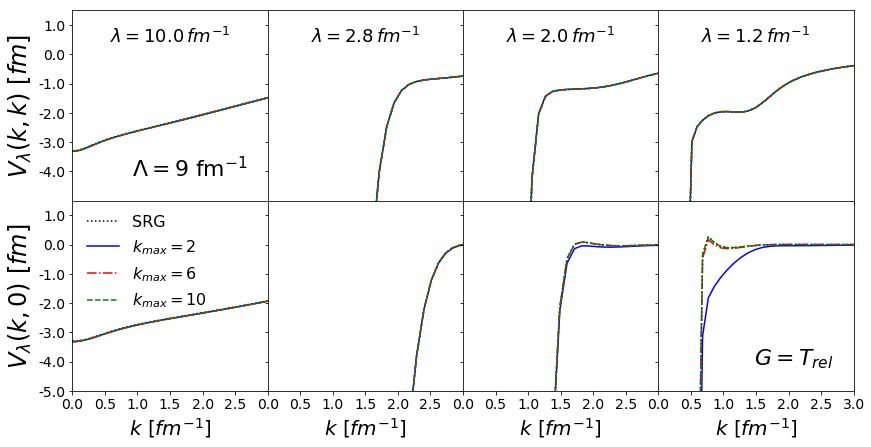

In [7]:
# Plot contours of Magnus-evolved potentials

# Lambda = 4 fm^-1 and Wegner generator
#potential_contours(900, 'Wegner')
# Lambda = 4 fm^-1 and kinetic energy generator
#potential_contours(900, 'T')
# Lambda = 9 fm^-1 and Wegner generator
#potential_contours(901, 'Wegner')
# Lambda = 9 fm^-1 and kinetic energy generator
#potential_contours(901, 'T')


# Plot diagonals and off-diagonals of Magnus-evolved potentials

# Lambda = 4 fm^-1 and Wegner generator
#potential_diagonals_offdiags(900, 'Wegner')
# Lambda = 4 fm^-1 and kinetic energy generator
#potential_diagonals_offdiags(900, 'T')
# Lambda = 9 fm^-1 and Wegner generator
#potential_diagonals_offdiags(901, 'Wegner')
# Lambda = 9 fm^-1 and kinetic energy generator
#potential_diagonals_offdiags(901, 'T')

In [8]:
# Calculate error on energies at lambda = 1.2 fm^-1
lamb = 2.8
# Set kvnn number
#kvnn = 900
kvnn = 901
# Deuteron index within eigenvalue array is 0 for kvnn = 900 and 1 for kvnn = 901 (because of the spurious state)
deuteron_index = kvnn - 900

# These results don't match the table in the notes currently for some reason - likely has something to do with how 
# evolved potentials are saved in comparison to the old way of loading evolved Hamiltonians in scattering units 
# fm^-2. Evolving the Hamiltonian directly and using this evolved Hamiltonian over the saved potentials gives the 
# previous results.


# Relative error on bound state energies
# SRG Wegner
#srg_wegner_bound_states_error = bound_states_error(kvnn, 'srg', 'Wegner', lamb)
# Magnus Wegner k_magnus = 2
#magnus_wegner_k_magnus2_bound_states_error = bound_states_error(kvnn, 'magnus', 'Wegner', lamb, k_magnus=2)
# Magnus Wegner k_magnus = 10
#magnus_wegner_k_magnus10_bound_states_error = bound_states_error(kvnn, 'magnus', 'Wegner', lamb, k_magnus=10)
# SRG relative kinetic energy
#srg_T_bound_states_error = bound_states_error(kvnn, 'srg', 'T', lamb)
# Magnus relative kinetic energy k_magnus = 2
#magnus_T_k_magnus2_bound_states_error = bound_states_error(kvnn, 'magnus', 'T', lamb, k_magnus=2)
# Magnus relative kinetic energy k_magnus = 10
#magnus_T_k_magnus10_bound_states_error = bound_states_error(kvnn, 'magnus', 'T', lamb, k_magnus=10)

# Print relative errors for deuteron
#print('SRG Wegner: relative_error = %.5e'%srg_wegner_bound_states_error[deuteron_index])
#print('Magnus Wegner k=2: relative_error = %.5e'%magnus_wegner_k_magnus2_bound_states_error[deuteron_index])
#print('Magnus Wegner k=10: relative_error = %.5e'%magnus_wegner_k_magnus10_bound_states_error[deuteron_index])
#print('SRG T: relative_error = %.5e'%srg_T_bound_states_error[deuteron_index])
#print('Magnus T k=2: relative_error = %.5e'%magnus_T_k_magnus2_bound_states_error[deuteron_index])
#print('Magnus T k=10: relative_error = %.5e'%magnus_T_k_magnus10_bound_states_error[deuteron_index])


# RMS error on energies
# SRG Wegner
#srg_wegner_error = eigenvalues_rms_error(kvnn, 'srg', 'Wegner', lamb)
# Magnus Wegner k_magnus = 2
#magnus_wegner_k_magnus2_error = eigenvalues_rms_error(kvnn, 'magnus', 'Wegner', lamb, k_magnus=2)
# Magnus Wegner k_magnus = 10
#magnus_wegner_k_magnus10_error = eigenvalues_rms_error(kvnn, 'magnus', 'Wegner', lamb, k_magnus=10)
# SRG relative kinetic energy
#srg_T_error = eigenvalues_rms_error(kvnn, 'srg', 'T', lamb)
# Magnus relative kinetic energy k_magnus = 2
#magnus_T_k_magnus2_error = eigenvalues_rms_error(kvnn, 'magnus', 'T', lamb, k_magnus=2)
# Magnus relative kinetic energy k_magnus = 10
#magnus_T_k_magnus10_error = eigenvalues_rms_error(kvnn, 'magnus', 'T', lamb, k_magnus=10)

# Print RMS errors
#print('SRG Wegner: rms_error = %.5e'%srg_wegner_error)
#print('Magnus Wegner k=2: rms_error = %.5e'%magnus_wegner_k_magnus2_error)
#print('Magnus Wegner k=10: rms_error = %.5e'%magnus_wegner_k_magnus10_error)
#print('SRG T: rms_error = %.5e'%srg_T_error)
#print('Magnus T k=2: rms_error = %.5e'%magnus_T_k_magnus2_error)
#print('Magnus T k=10: rms_error = %.5e'%magnus_T_k_magnus10_error)